In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tweet_emotions.csv")

In [3]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
df.shape

(40000, 3)

In [5]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns="tweet_id",inplace=True)

/Users/avigyarana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

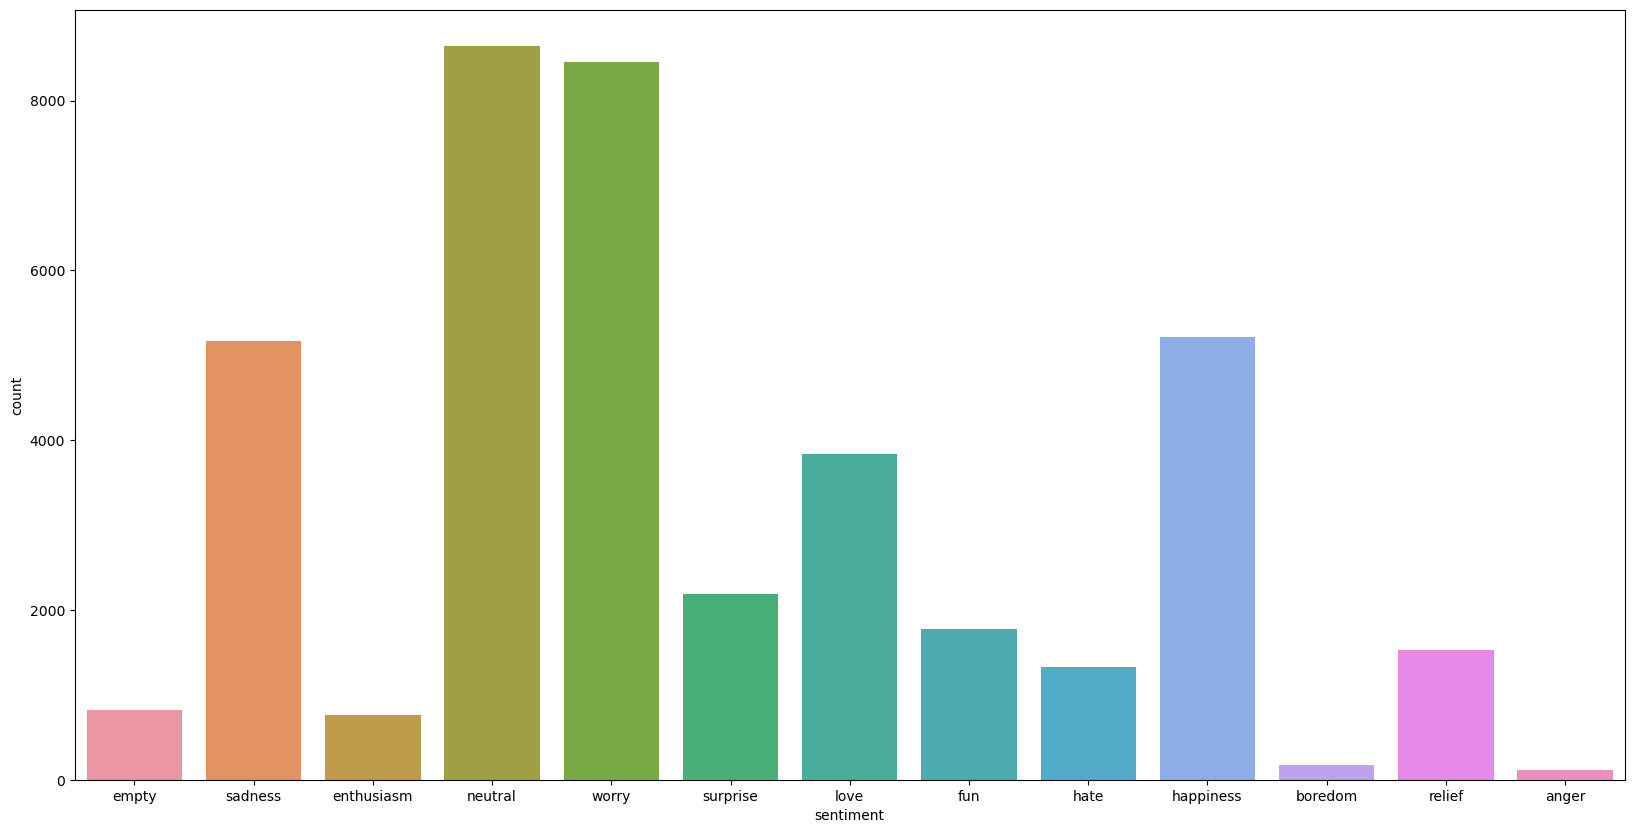

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(df['sentiment'])

In [9]:
#preprocessing

import re
def remove_tags(raw_text):
    pattern = r"(#\w+)|(@\w+)|(https?://\S+)"
    clean_text = re.sub(pattern, "", raw_text)
    return clean_text


In [10]:
df["content"] = df["content"].apply(lambda x:remove_tags(x))

In [11]:
df.head(5)

,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston...


In [12]:
#lower casting

df["content"] = df["content"].apply(lambda x: remove_tags(x))

In [13]:
df.head(5)

,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston...


In [14]:
df["content"] = df["content"].apply(lambda x: x.lower())

In [15]:
df["content"][2]

'funeral ceremony...gloomy friday...'

In [16]:
df

,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,layin n bed with a headache ughhhh...waitin o...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends soon!
4,neutral,we want to trade with someone who has houston...
...,...,...
39995,neutral,
39996,love,happy mothers day all my love
39997,love,happy mother's day to all the mommies out ther...
39998,happiness,wassup beautiful!!! follow me!! peep out my ...


In [17]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

sw_list = stopwords.words("english")

df["content"] = df['content'].apply(lambda x: [items for items in x.split() if items not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avigyarana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df

,sentiment,content
0,empty,know listenin bad habit earlier started freaki...
1,sadness,layin n bed headache ughhhh...waitin call...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants hang friends soon!
4,neutral,"want trade someone houston tickets, one will."
...,...,...
39995,neutral,
39996,love,happy mothers day love
39997,love,"happy mother's day mommies there, woman man lo..."
39998,happiness,wassup beautiful!!! follow me!! peep new hit s...


In [19]:
X = df['content']
y = df['sentiment']

In [20]:
X.head()

0    know listenin bad habit earlier started freaki...
1         layin n bed headache ughhhh...waitin call...
2                  funeral ceremony...gloomy friday...
3                             wants hang friends soon!
4        want trade someone houston tickets, one will.
Name: content, dtype: object

In [21]:
y.head()

0         empty
1       sadness
2       sadness
3    enthusiasm
4       neutral
Name: sentiment, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y= le.fit_transform(y)

In [23]:
y

array([ 2, 10, 10, ...,  7,  5,  7])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [25]:
X_train.shape

(32000,)

In [26]:
y_test.shape

(8000,)

In [27]:
#text vectorization

from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv = CountVectorizer()

In [29]:
#bow = bag of words

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.fit_transform(X_test).toarray()

In [30]:
X_train_bow.shape

(32000, 26216)

In [31]:
X_test_bow.shape

(8000, 11539)

In [32]:
y_test.shape

(8000,)

In [33]:
#modeling

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)

MultinomialNB()

In [34]:
y_pred = mnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

ValueError: X has 11539 features, but MultinomialNB is expecting 26216 features as input.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegressionticRegression(multi_class='multinomial')
lr.fit(X_train_bow, y_train)

In [ ]:
y_pred = lr.predict(X_test_bow)

accuracy_score(y_test, y_pred)